In [1]:
#%matplotlib inline
#%matplotlib gtk
import sys
sys.path.insert(0, '../')
from pytest import approx
import fconcrete as fc
#import fconcrete
#from fconcrete import helpers, duplicated, Material, e, Beam, Node, Loads, Nodes, Load,Material, ConcreteBeam, SingleBeamElement, Rectangle, Concrete, Section, ConcreteSteels
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3, suppress=True, linewidth=3000)

#from math import log

# Tension in MPa
# length in cm
# Shear in kN

In [2]:
material = fc.Concrete(fck='20 MPa', aggressiveness=2)
section = fc.Rectangle(25,56, material)

f1 = fc.Load.UniformDistributedLoad(-0.1622, x_begin=0, x_end=113)
f2 = fc.Load.UniformDistributedLoad(-0.4994, x_begin=113, x_end=583)
f3 = fc.Load.UniformDistributedLoad(-0.4196, x_begin=583, x_end=1188)

n1 = fc.Node.SimpleSupport(x=0)
n2 = fc.Node.SimpleSupport(x=113)
n3 = fc.Node.SimpleSupport(x=583)
n4 = fc.Node.SimpleSupport(x=1188)

bar1 = fc.SingleBeamElement([n1, n2], section)
bar2 = fc.SingleBeamElement([n2, n3], section)
bar3 = fc.SingleBeamElement([n3, n4], section)

fc.config.available_material = {
"concrete_steel_bars":fc.AvailableConcreteSteelBar(
        diameters=[8]
)}
    
beam = fc.ConcreteBeam(
    loads = [f1, f2, f3],
    beam_elements = [bar1, bar2, bar3],
    bar_steel_removal_step = 2
)
self = beam

In [3]:
self.steel_bars

[{'long_begin': -25.310800830830832, 'long_end': 200.12162869869871, 'quantity': 2, 'diameter': -0.8, 'area': -1.0}
 {'long_begin': 34.14865762762763, 'long_end': 168.01352113113114, 'quantity': 4, 'diameter': -0.8, 'area': -2.0}
 {'long_begin': 83.24325184184184, 'long_end': 141.17568285285284, 'quantity': 5, 'diameter': -0.8, 'area': -2.5}
 {'long_begin': 148.31081786786788, 'long_end': 454.6081109009009, 'quantity': 5, 'diameter': 0.8, 'area': 2.5}
 {'long_begin': 402.79730007007004, 'long_end': 733.7297273773773, 'quantity': 2, 'diameter': -0.8, 'area': -1.0}
 {'long_begin': 402.79730007007004, 'long_end': 733.7297273773773, 'quantity': 2, 'diameter': -0.8, 'area': -1.0}
 {'long_begin': 434.391895025025, 'long_end': 711.4729714414414, 'quantity': 4, 'diameter': -0.8, 'area': -2.0}
 {'long_begin': 434.391895025025, 'long_end': 711.4729714414414, 'quantity': 4, 'diameter': -0.8, 'area': -2.0}
 {'long_begin': 461.0675693593593, 'long_end': 691.2567555655655, 'quantity': 6, 'diameter':

### Decaleged Behaviour

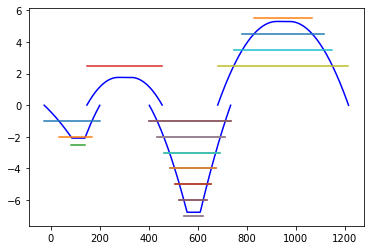

In [5]:
x, yp, yn = beam.getSteelAreaDiagram()
plt.plot(x, yp, 'b-')
plt.plot(x, yn, 'b-')
self.steel_bars.plot("area")